<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# MiMi
## A Demonstration of its Applicabilty to the Entire Hebrew Bible

MiMi is a deterministic - meaning 'rule driven' - coreference resolver for Biblical Hebrew. MiMi is the concatenation of *Mi Mi* in Biblical Hebrew, which means 'Who? Who?' MiMi is used as a tool to identify and analyse participants or entities in a text. MiMi has two phases: mention detection and coreference resolution. The aim was to build a near perfect mention detection phase and a modular coreference resolver that can be enhanced in future research. Most coreference resolvers, machine learning models or deterministic models, remove singletons in an additional third stage. We have chosen to retain singletons, since they are also of importance for participant analysis in Biblical Hebrew.

The aim of this notebook is demonstrate that MiMi is able to operate on the entire Hebrew Bible, on any Hebrew Bible book, regardless the genre. The MiMi algorithm used for this notebook is adjusted accordingly, hence it does not produce `.ann` files like MiMi in the main [mimi](https://github.com/cmerwich/participant-analysis/tree/master/mimi) directory. For an explanation of how MiMi works and how to run it, I refer to the main directory. 

#### Statistics 
For both the mention detection phase and the coreference resolution phase statistics are generated per Hebrew Bible Book: 
* Mention detection statistics: give a view on what the success and failure of the mention parser is. The average success for the whole Hebrew Bible 99.5%. 
* Coreference resolution statistics: give a view on how many coreference singleton sets have been resolved. MiMi resolves about 29.6% sets on average. Important to note is that the unresolved sets contain both truly unresolved sets and singletons. The resolution percentage may thus in fact be higher. 
* Sieve statistics: give a view on how many singleton sets are resolved per sieve. 

#### Files
For each book a plain text `.out` file is generated in the same directory as in which the coreference command is given. The files are called `mention_errors_BIBLEBOOKNAME`. The `.out` file contains useful information about which phrase atoms could not be parsed by SLY's parser. The token is given, the text of the token, the start index of the word and word node. 

## 1. Import Modules 

In [24]:
__author__ = 'erwich/sikkel'

In [25]:
import os
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import seaborn as sns

In [26]:
from utils import ExportToLatex
from mimi_hb import GoMiMi

In [27]:
# Output location for the generated tables
OUTPUT_LOC = os.path.expanduser('~/Documents/PhD/1-dissertation/DISSERTATIONlatex/Tables/')

## 2. Run `GoMiMi`

For the two stages - mention detection and coreference resolution -`GoMiMi` produces per Bible book mention parse statistics; coreference resolution statistics and sieve statistics. 

In [28]:
mention_stats_df, coref_stats_df, sieve_stats_df = GoMiMi()


 Mention Parse Statistics Genesis: 
 15633 phrase atoms INPUT 
 15552 phrase atoms SUCCESFULLY parsed 
 +151 extra mentions SUCCESFULLY parsed from phrase atoms 
 -108 phrase atoms without mentions 
 81 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -80 phrase atoms without mentions from phrase atom ERRORS 
 15596 mention coreference input 
 99.5% parsing succes 
 0.5% parsing error

 Coreference Resolution Statistics Genesis: 
 15596 total input corefs 
 10699 corefs RESOLVED 
 4897 corefs UNRESOLVED 
 68.6% corefs RESOLVED 
 31.4% corefs UNRESOLVED 
 2217 classes

 Sieve Statistics Genesis: 
 1p 2p Pronoun Sieve: 1007 
 Vocative Sieve: 63 
 String Sieve: 3190 
 Entity Sieve: 946 
 Apposition Sieve: 163 
 Fronted Element Sieve: 12 
 Predicate Sieve: 3234 
 3p Pronoun Sieve: 2084 
 Total Sieves: 10699 
 Total Classes: 2217

 Mention Parse Statistics Exodus: 
 11730 phrase atoms INPUT 
 11637 phrase atoms SUCCESFULLY parsed 
 +184 extra mentio


 Mention Parse Statistics 2_Kings: 
 8605 phrase atoms INPUT 
 8578 phrase atoms SUCCESFULLY parsed 
 +105 extra mentions SUCCESFULLY parsed from phrase atoms 
 -50 phrase atoms without mentions 
 27 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -27 phrase atoms without mentions from phrase atom ERRORS 
 8633 mention coreference input 
 99.7% parsing succes 
 0.3% parsing error

 Coreference Resolution Statistics 2_Kings: 
 8633 total input corefs 
 5822 corefs RESOLVED 
 2811 corefs UNRESOLVED 
 67.4% corefs RESOLVED 
 32.6% corefs UNRESOLVED 
 1278 classes

 Sieve Statistics 2_Kings: 
 1p 2p Pronoun Sieve: 187 
 Vocative Sieve: 22 
 String Sieve: 1705 
 Entity Sieve: 525 
 Apposition Sieve: 219 
 Fronted Element Sieve: 3 
 Predicate Sieve: 1910 
 3p Pronoun Sieve: 1251 
 Total Sieves: 5822 
 Total Classes: 1278

 Mention Parse Statistics Isaiah: 
 13722 phrase atoms INPUT 
 13660 phrase atoms SUCCESFULLY parsed 
 +98 extra mentions SUCCESF


 Mention Parse Statistics Nahum: 
 483 phrase atoms INPUT 
 482 phrase atoms SUCCESFULLY parsed 
 +1 extra mentions SUCCESFULLY parsed from phrase atoms 
 -6 phrase atoms without mentions 
 1 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -1 phrase atoms without mentions from phrase atom ERRORS 
 477 mention coreference input 
 99.8% parsing succes 
 0.2% parsing error

 Coreference Resolution Statistics Nahum: 
 477 total input corefs 
 225 corefs RESOLVED 
 252 corefs UNRESOLVED 
 47.2% corefs RESOLVED 
 52.8% corefs UNRESOLVED 
 87 classes

 Sieve Statistics Nahum: 
 1p 2p Pronoun Sieve: 44 
 Vocative Sieve: 2 
 String Sieve: 27 
 Entity Sieve: 9 
 Apposition Sieve: 0 
 Fronted Element Sieve: 1 
 Predicate Sieve: 80 
 3p Pronoun Sieve: 62 
 Total Sieves: 225 
 Total Classes: 87

 Mention Parse Statistics Habakkuk: 
 588 phrase atoms INPUT 
 587 phrase atoms SUCCESFULLY parsed 
 +0 extra mentions SUCCESFULLY parsed from phrase atoms 
 -10 p


 Mention Parse Statistics Song_of_songs: 
 1162 phrase atoms INPUT 
 1158 phrase atoms SUCCESFULLY parsed 
 +5 extra mentions SUCCESFULLY parsed from phrase atoms 
 -7 phrase atoms without mentions 
 4 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -4 phrase atoms without mentions from phrase atom ERRORS 
 1156 mention coreference input 
 99.7% parsing succes 
 0.3% parsing error

 Coreference Resolution Statistics Song_of_songs: 
 1156 total input corefs 
 624 corefs RESOLVED 
 532 corefs UNRESOLVED 
 54.0% corefs RESOLVED 
 46.0% corefs UNRESOLVED 
 191 classes

 Sieve Statistics Song_of_songs: 
 1p 2p Pronoun Sieve: 199 
 Vocative Sieve: 47 
 String Sieve: 131 
 Entity Sieve: 3 
 Apposition Sieve: 3 
 Fronted Element Sieve: 1 
 Predicate Sieve: 140 
 3p Pronoun Sieve: 100 
 Total Sieves: 624 
 Total Classes: 191

 Mention Parse Statistics Ecclesiastes: 
 2150 phrase atoms INPUT 
 2138 phrase atoms SUCCESFULLY parsed 
 +10 extra mentions SU

## 3. Performance

### 3.1 Average mention detection

In [29]:
# average mention detection success HB
avg_mention_success = round((1 - (mention_stats_df['pa errors'].sum() / mention_stats_df['pa parsed'].sum())) * 100, 1)

# average mention detection failure HB
avg_mention_failure = round((mention_stats_df['pa errors'].sum() / mention_stats_df['pa parsed'].sum()) * 100, 1)

print('Mention detection for the Hebrew Bible: \n',\
    f'{avg_mention_success}% average success \n',\
    f'{avg_mention_failure}% average failure')

Mention detection for the Hebrew Bible: 
 99.5% average success 
 0.5% average failure


### 3.2 Average coreference resolution

In [30]:
# average coreference resolution success HB
avg_coreference_resolved = round(((1- coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum())) * 100, 1)

# average coreference resolution success HB
avg_coreference_unresolved = round((coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum()) * 100, 1)

print('Coreference Resolution for the Hebrew Bible: \n',\
    f'{avg_coreference_resolved}% average resolved \n',\
    f'{avg_coreference_unresolved}% average unresolved')

Coreference Resolution for the Hebrew Bible: 
 63.5% average resolved 
 36.5% average unresolved


### 3.3 Mention detection parsing errors

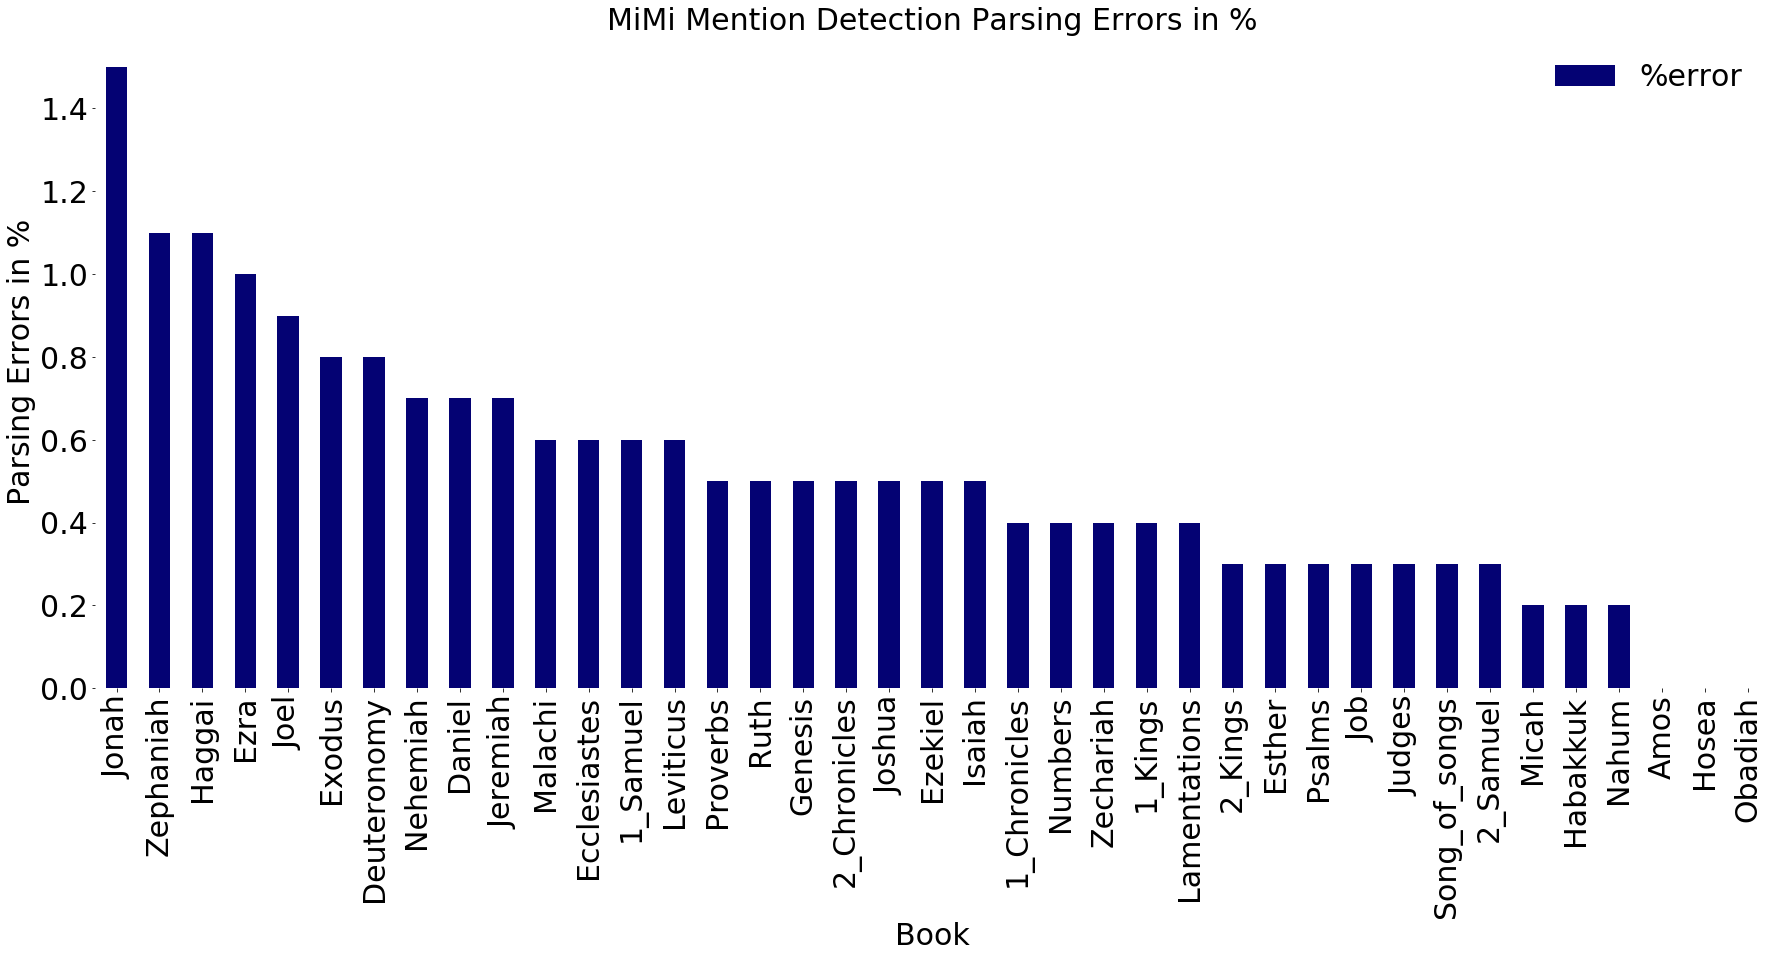

In [31]:
def PlotMentionDf(mention_stats_df):

    mention_stats_sort = mention_stats_df.sort_values(by=['%error'], ascending=False)
    
    mention_stats_sort.plot(x='book', y='%error', kind='bar', 
                            color='xkcd:deep blue', 
                            figsize=(30,12),
                            fontsize=30
                           )
    
    plt.title(('MiMi Mention Detection Parsing Errors in %'), fontsize=30)
    plt.xlabel('Book', fontsize=30)
    plt.ylabel('Parsing Errors in %', fontsize=30)
    plt.box(False)
    plt.legend(frameon=False, fontsize=30)
    plt.show()
    
PlotMentionDf(mention_stats_df)

In [32]:
mention_stats_df

,book,phrase atoms,pa parsed,+m,-pa,pa errors,+m errors,-pa errors,mentions,%parsed,%error
0,Genesis,15633,15552,151,108,81,0,80,15596,99.5,0.5
1,Exodus,11730,11637,184,47,93,2,87,11782,99.2,0.8
2,Leviticus,8491,8437,176,6,54,0,54,8607,99.4,0.6
3,Numbers,11053,11009,141,45,44,0,42,11107,99.6,0.4
4,Deuteronomy,11111,11020,116,40,91,0,90,11097,99.2,0.8
5,Joshua,6552,6522,159,26,30,0,30,6655,99.5,0.5
6,Judges,7208,7186,109,60,22,0,22,7235,99.7,0.3
7,1_Samuel,10018,9958,91,87,60,1,58,9965,99.4,0.6
8,2_Samuel,8197,8175,89,60,22,0,22,8204,99.7,0.3
9,1_Kings,9522,9482,103,37,40,0,40,9548,99.6,0.4


### 3.4 Coreference resolution success

In [33]:
coref_stats_df

,book,input corefs,resolved,unresolved,%resolved,%unresolved,classes
0,Genesis,15596,10699,4897,68.6,31.4,2217
1,Exodus,11782,7951,3831,67.5,32.5,1704
2,Leviticus,8607,6342,2265,73.7,26.3,1103
3,Numbers,11107,7722,3385,69.5,30.5,1557
4,Deuteronomy,11097,7476,3621,67.4,32.6,1511
5,Joshua,6655,4405,2250,66.2,33.8,899
6,Judges,7235,4886,2349,67.5,32.5,1073
7,1_Samuel,9965,6790,3175,68.1,31.9,1438
8,2_Samuel,8204,5527,2677,67.4,32.6,1180
9,1_Kings,9548,6684,2864,70.0,30.0,1356


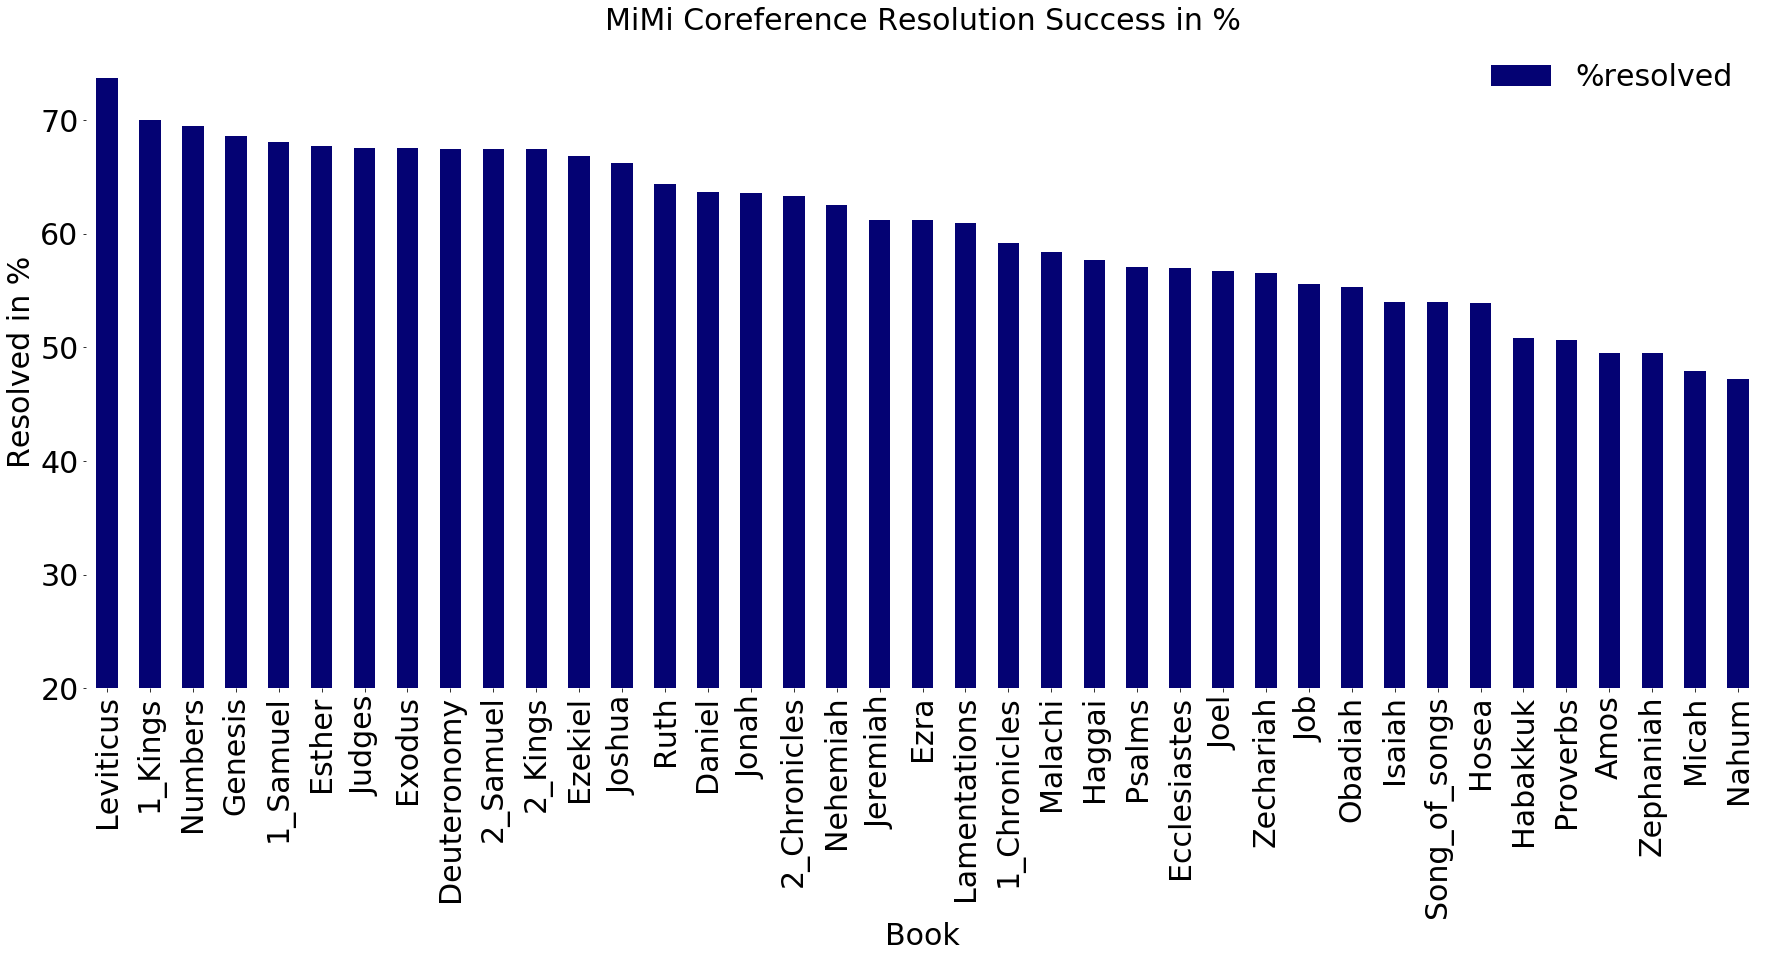

In [40]:
def PlotCoreferenceDf(coref_stats_df):

    coref_stats_sort = coref_stats_df.sort_values(by=['%resolved'], ascending=False)
    
    coref_stats_sort.plot(x='book', y='%resolved', kind='bar', color='xkcd:deep blue', 
                  figsize=(30,12),
                  fontsize=30, 
                 )

    plt.title(('MiMi Coreference Resolution Success in %'), fontsize=30)
    plt.xlabel('Book', fontsize=30)
    plt.ylabel('Resolved in %', fontsize=30)
    plt.box(False)
    plt.legend(frameon=False, fontsize=30)
    plt.ylim(ymin=20)
    plt.show()
    
PlotCoreferenceDf(coref_stats_df)

In [35]:
coref_stats_df.sort_values(by=['%resolved'], ascending=False)

,book,input corefs,resolved,unresolved,%resolved,%unresolved,classes
2,Leviticus,8607,6342,2265,73.7,26.3,1103
9,1_Kings,9548,6684,2864,70.0,30.0,1356
3,Numbers,11107,7722,3385,69.5,30.5,1557
0,Genesis,15596,10699,4897,68.6,31.4,2217
7,1_Samuel,9965,6790,3175,68.1,31.9,1438
33,Esther,2055,1391,664,67.7,32.3,291
6,Judges,7235,4886,2349,67.5,32.5,1073
1,Exodus,11782,7951,3831,67.5,32.5,1704
4,Deuteronomy,11097,7476,3621,67.4,32.6,1511
8,2_Samuel,8204,5527,2677,67.4,32.6,1180


### 3.5 Coreference resolution: sieve statistics 

In [36]:
sieve_stats_df

sieve_stats_df.sort_values(by=['string', 'entity', '3p pronoun'], ascending=False)

,book,1p 2p pronoun,vocative,string,entity,apposition,fronted element,predicate,3p pronoun,total sieves,classes
13,Ezekiel,1391,126,3336,210,68,17,2433,1912,9493,2198
0,Genesis,1007,63,3190,946,163,12,3234,2084,10699,2217
3,Numbers,395,18,3107,638,155,8,1826,1575,7722,1557
1,Exodus,557,13,2743,635,62,4,2260,1677,7951,1704
12,Jeremiah,1112,126,2696,612,237,9,2744,2031,9567,2539
2,Leviticus,501,0,2534,252,29,7,1540,1479,6342,1103
9,1_Kings,476,43,2300,590,226,3,1886,1160,6684,1356
4,Deuteronomy,1596,17,2155,428,80,5,1904,1291,7476,1511
38,2_Chronicles,351,44,1858,501,218,24,1691,1260,5947,1374
7,1_Samuel,536,33,1807,962,94,1,2213,1144,6790,1438


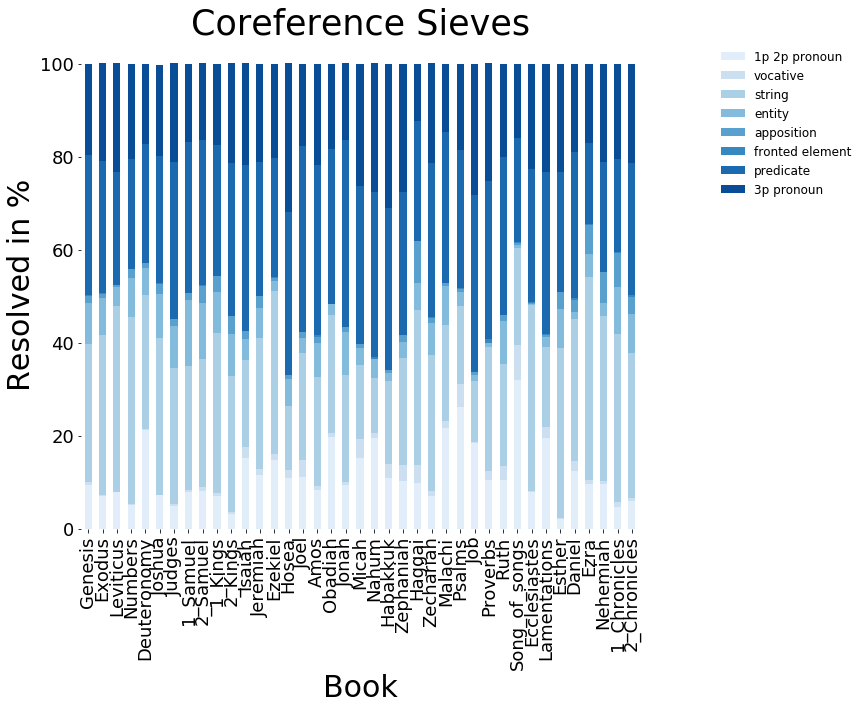

In [37]:
#sns.choose_colorbrewer_palette('sequential')

sieves = ('1p 2p pronoun', 'vocative', 'string', 'entity', 
          'apposition', 'fronted element', 'predicate', '3p pronoun'
         )

colours = sns.color_palette("Blues", n_colors=len(sieves)) #"RdGy"

#books = sieve_stats_df['book']

df = sieve_stats_df.drop(['total sieves', 'classes'], axis=1)
df = df.set_index('book')

res = round(df.div(df.sum(axis=1), axis=0)*100, 1)
res = res.reset_index()

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
res.plot(kind='bar', x='book', stacked=True, figsize=(10,9), color=colours)
plt.title(('Coreference Sieves'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Resolved in %', fontsize=30)
plt.box(False)
plt.legend(frameon=False, fontsize=12, loc='best', bbox_to_anchor=(.9, .5, 0.5, 0.5))
plt.show()

In [38]:
res
res.sort_values(by=['string', 'entity', '3p pronoun'], ascending=False)

,book,1p 2p pronoun,vocative,string,entity,apposition,fronted element,predicate,3p pronoun
35,Ezra,9.6,0.8,43.7,5.0,6.1,0.3,17.5,16.9
3,Numbers,5.1,0.2,40.2,8.3,2.0,0.1,23.6,20.4
2,Leviticus,7.9,0.0,40.0,4.0,0.5,0.1,24.3,23.3
31,Ecclesiastes,7.8,0.4,39.9,0.2,0.2,0.2,28.7,22.5
33,Esther,2.0,0.3,36.6,8.4,3.5,0.1,25.7,23.4
37,1_Chronicles,4.6,1.1,36.2,10.1,7.3,0.2,20.1,20.4
36,Nehemiah,9.7,0.6,35.4,2.9,6.5,0.0,23.7,21.2
13,Ezekiel,14.7,1.3,35.1,2.2,0.7,0.2,25.6,20.1
1,Exodus,7.0,0.2,34.5,8.0,0.8,0.1,28.4,21.1
9,1_Kings,7.1,0.6,34.4,8.8,3.4,0.0,28.2,17.4


In [41]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_percent_opt_hb', res, indx = False)